In [2]:
%matplotlib inline

from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datas=pd.read_csv('C:\\Users\\HongYuChai\\Desktop\\datachy\\nsw.csv')
index=pd.date_range('1/1/2015','7/19/2017',freq='30min')
index1=index[1:]
dta=pd.Series(datas['TOTALDEMAND'])
dta.index=pd.Index(pd.date_range('1/1/2015','7/19/2017',freq='30min')[1:])

In [4]:
import time
holi='2016/12/25 0:00'
a=time.strptime(holi, '%Y/%m/%d %H:%M' )
print(a)

time.struct_time(tm_year=2016, tm_mon=12, tm_mday=25, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=360, tm_isdst=-1)


In [5]:
import datetime
d = datetime.datetime(* a[:6])
print(d)

2016-12-25 00:00:00


In [6]:
index2=pd.date_range('12/10/2016','12/17/2016',freq='30min')
index3=pd.date_range('12/4/2015','12/11/2015',freq='30min')

In [7]:
index4=pd.date_range('12/25/2016','12/26/2016',freq='30min')

In [8]:
B=0.5
rs=[]
for i in range(0,48):#遍历一天的每一时刻
    A1=B*(1-B)**5*dta[index2[i]]+B*(1-B)**4*dta[index2[i+48]]+B*(1-B)**3*dta[index2[i+48*2]]+B*(1-B)**2*dta[index2[i+48*3]]+B*(1-B)*dta[index2[i+48*4]]+B*dta[index2[i+48*5]]
    A2=B*(1-B)**5*dta[index3[i]]+B*(1-B)**4*dta[index3[i+48]]+B*(1-B)**3*dta[index3[i+48*2]]+B*(1-B)**2*dta[index3[i+48*3]]+B*(1-B)*dta[index3[i+48*4]]+B*dta[index3[i+48*5]]
    Pre=(A1/A2)*dta[index4[i]]
    rs.append(Pre)


In [9]:
predict=pd.DataFrame({'predict':rs})
pred=pd.Series(predict['predict'])
pred.index=pd.Index(index4[0:48])
pred

2016-12-25 00:00:00    6692.739970
2016-12-25 00:30:00    6481.845022
2016-12-25 01:00:00    6261.847658
2016-12-25 01:30:00    5964.490810
2016-12-25 02:00:00    5801.697564
2016-12-25 02:30:00    5660.453057
2016-12-25 03:00:00    5573.777485
2016-12-25 03:30:00    5509.056044
2016-12-25 04:00:00    5499.656603
2016-12-25 04:30:00    5532.473228
2016-12-25 05:00:00    5521.202927
2016-12-25 05:30:00    5620.494845
2016-12-25 06:00:00    5773.643368
2016-12-25 06:30:00    6051.026783
2016-12-25 07:00:00    6301.308227
2016-12-25 07:30:00    6557.006326
2016-12-25 08:00:00    6765.884098
2016-12-25 08:30:00    6978.593935
2016-12-25 09:00:00    7086.903730
2016-12-25 09:30:00    7210.716817
2016-12-25 10:00:00    7290.469375
2016-12-25 10:30:00    7377.806654
2016-12-25 11:00:00    7408.104835
2016-12-25 11:30:00    7260.308536
2016-12-25 12:00:00    7188.994409
2016-12-25 12:30:00    7048.286935
2016-12-25 13:00:00    6966.060972
2016-12-25 13:30:00    6911.668732
2016-12-25 14:00:00 

In [10]:
pred.to_csv('prd.csv')

In [11]:
dta[index4[0:47]].to_csv('sor.csv')

In [12]:
mis=0
for i in range(0,48) :
        mis+=abs((dta[index4[i]]-pred[index4[i]])/dta[index4[i]])
mis=mis/48
mis

0.022784027327468176

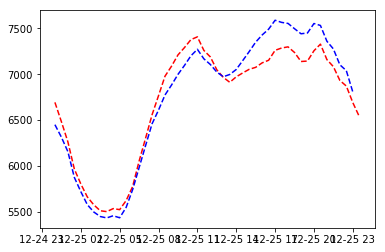

In [13]:
plt.plot(pred, 'r--', dta[index4[0:47]], 'b--')
plt.show()